In [61]:
import numpy as np
import pandas as pd
import seaborn as sns

In [94]:
import warnings
warnings.filterwarnings("ignore")

## Data

Description: This dataset contains information on the performance of high school students in mathematics, including their grades and demographic information. The data was collected from three high schools in the United States.
Link: https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics

In [2]:
df=pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [74]:
print("The math score median is {}".format(np.median(df["math score"])))
print("The reading score median is {}".format(np.median(df["reading score"])))
print("The writing score median is {}".format(np.median(df["writing score"])))

The math score median is 66.0
The reading score median is 70.0
The writing score median is 69.0


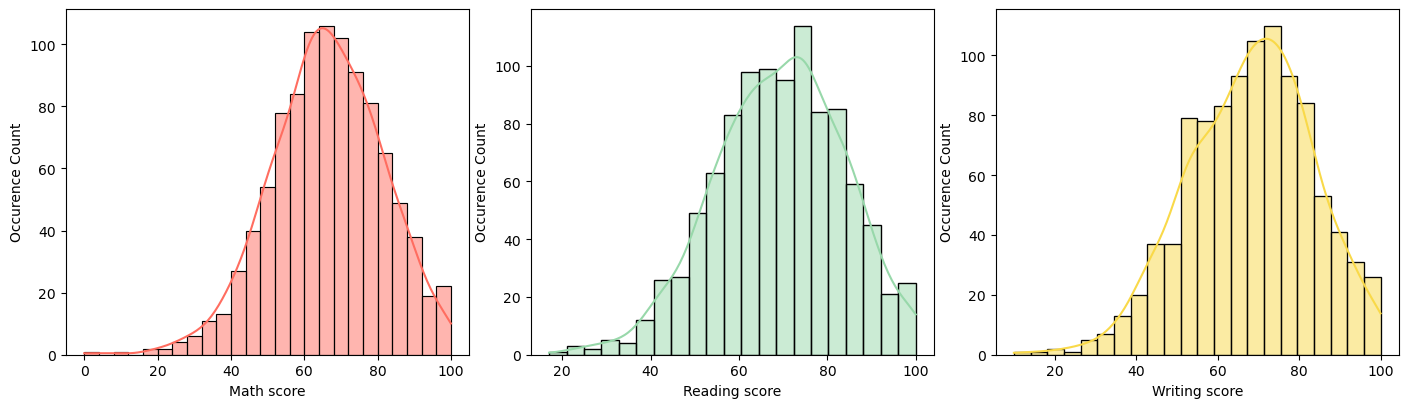

In [75]:
colors=["#FF6D60","#98D8AA","#F9D949"]
# This is gonna select only the score cols
n_cols=df.select_dtypes(include="int64").columns

#Plot Distributions
fig,axs=plt.subplots(1,3,figsize=(14,4))
axs=axs.flat
for colm,ax,color in zip(n_cols,axs,colors):
    sns.histplot(ax=ax,data=df,x=colm,kde=True,color=color)
    ax.set_xlabel(str(colm).capitalize())
    ax.set_ylabel("Occurence Count")
    
    
plt.tight_layout(pad=0.4)
plt.show()

In [10]:
education=list(df['parental level of education'].unique())

## Parental education and average math score

In [11]:
result=dict()
for i in education:
    result[i]=df.loc[df['parental level of education']==i]['math score'].mean()
print(result)

{"bachelor's degree": 69.38983050847457, 'some college': 67.1283185840708, "master's degree": 69.7457627118644, "associate's degree": 67.88288288288288, 'high school': 62.13775510204081, 'some high school': 63.497206703910614}


In [12]:
import matplotlib.pylab as plt

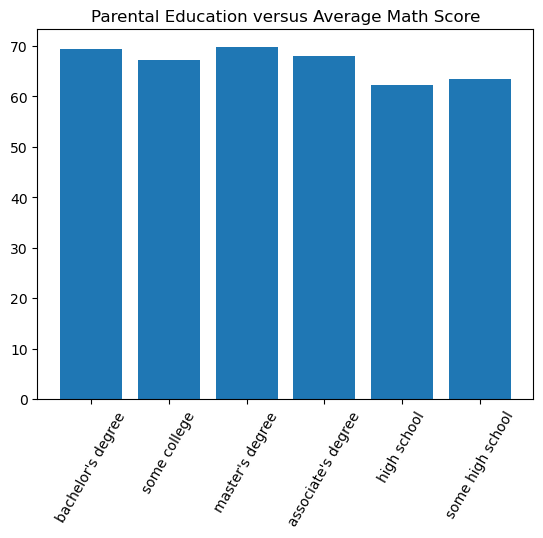

In [57]:
names = list(result.keys())
values = list(result.values())

plt.bar(range(len(result)), values, tick_label=names)
plt.xticks(rotation=60)
#fig.subplots_adjust(bottom=spacing)
plt.title('Parental Education versus Average Math Score')
plt.show()

## Parental education and average reading score

In [25]:

result1=dict()
for i in education:
    result1[i]=df.loc[df['parental level of education']==i]['reading score'].mean()
print(result1)

{"bachelor's degree": 73.0, 'some college': 69.46017699115045, "master's degree": 75.37288135593221, "associate's degree": 70.92792792792793, 'high school': 64.70408163265306, 'some high school': 66.93854748603351}


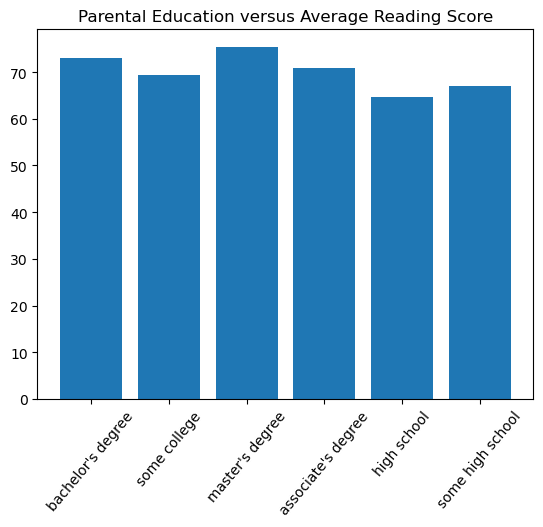

In [58]:
names = list(result1.keys())
values = list(result1.values())

plt.bar(range(len(result1)), values, tick_label=names)
plt.xticks(rotation=50)
plt.title('Parental Education versus Average Reading Score')
#fig.subplots_adjust(bottom=spacing)

plt.show()

## Parental education and average writing score

In [59]:
result2=dict()
for i in education:
    result2[i]=df.loc[df['parental level of education']==i]['writing score'].mean()
print(result2)

{"bachelor's degree": 73.38135593220339, 'some college': 68.84070796460178, "master's degree": 75.67796610169492, "associate's degree": 69.8963963963964, 'high school': 62.44897959183673, 'some high school': 64.88826815642459}


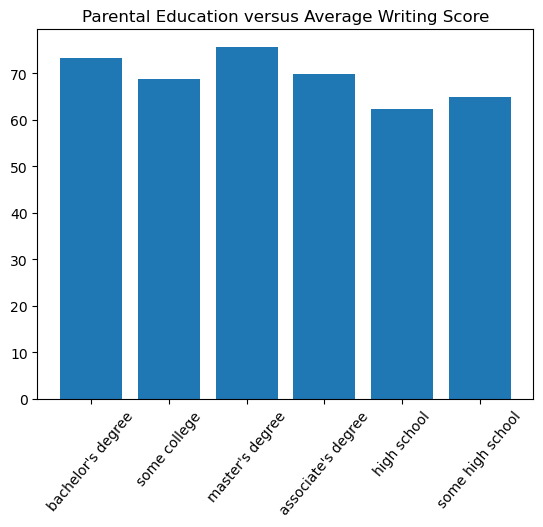

In [60]:
names = list(result2.keys())
values = list(result2.values())

plt.bar(range(len(result2)), values, tick_label=names)
plt.xticks(rotation=50)
plt.title('Parental Education versus Average Writing Score')
#fig.subplots_adjust(bottom=spacing)

plt.show()

Text(0, 0.5, 'Writing score')

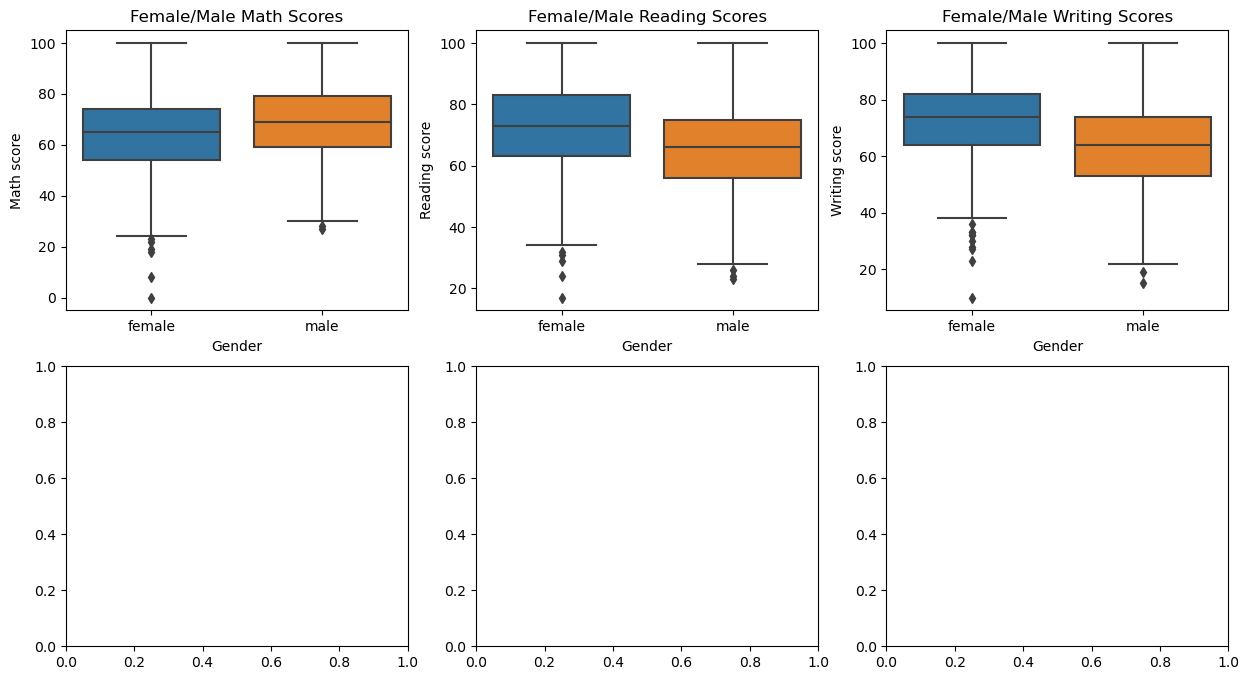

In [89]:
fig,axs=plt.subplots(2,3,figsize=(15,8))
#Plotting Female On Male Scores
sns.boxplot(ax=axs[0][0],data=df,x="gender",y=n_cols[0])
axs[0][0].set_title("Female/Male Math Scores")
axs[0][0].set_xlabel("Gender")
axs[0][0].set_ylabel(str(n_cols[0]).capitalize())

sns.boxplot(ax=axs[0][1],data=df,x="gender",y=n_cols[1])
axs[0][1].set_title("Female/Male Reading Scores")
axs[0][1].set_xlabel("Gender")
axs[0][1].set_ylabel(str(n_cols[1]).capitalize())

sns.boxplot(ax=axs[0][2],data=df,x="gender",y=n_cols[2])
axs[0][2].set_title("Female/Male Writing Scores")
axs[0][2].set_xlabel("Gender")
axs[0][2].set_ylabel(str(n_cols[2]).capitalize())

 ## Impact of Test Preparation Course on Scores

In [28]:
prep=list(df['test preparation course'].unique())

In [29]:
result_math=dict()
for i in prep:
    result_math[i]=df.loc[df['test preparation course']==i]['math score'].mean()
print(result_math)

result_reading=dict()
for i in prep:
    result_reading[i]=df.loc[df['test preparation course']==i]['reading score'].mean()
print(result_reading)

result_writing=dict()
for i in prep:
    result_writing[i]=df.loc[df['test preparation course']==i]['writing score'].mean()
print(result_writing)

{'none': 64.0778816199377, 'completed': 69.69553072625699}
{'none': 66.53426791277259, 'completed': 73.89385474860335}
{'none': 64.50467289719626, 'completed': 74.41899441340782}


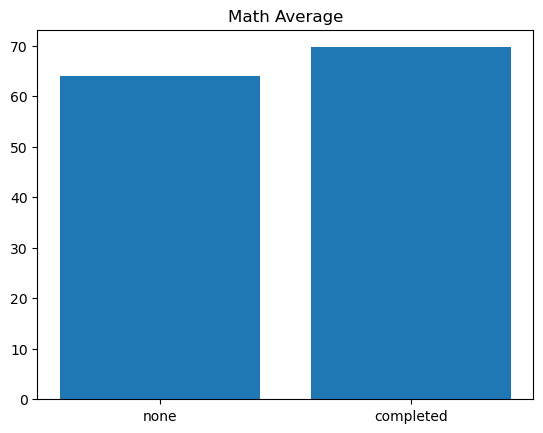

<Figure size 100x100 with 0 Axes>

In [54]:
#plt.subplots(1, 3, sharex=True, sharey=True)
names1 = list(result_math.keys())
values1 = list(result_math.values())
plt.bar(range(len(result_math)), values1, tick_label=names1)
plt.title('Math Average')
plt.figure(figsize=(1,1))
#plt.figure().set_figheight(1)
plt.show()


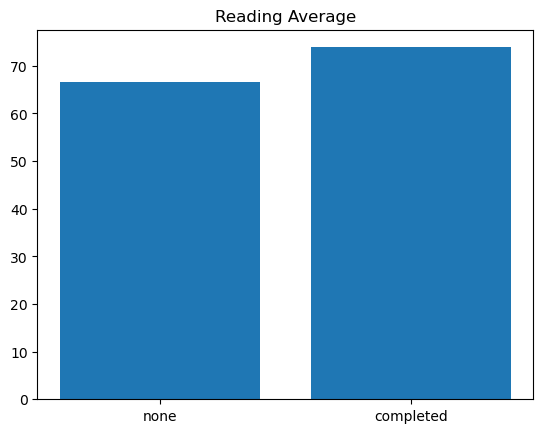

In [55]:
names2 = list(result_reading.keys())
values2 = list(result_reading.values())
plt.bar(range(len(result_reading)), values2, tick_label=names2)
#plt.xticks(rotation=50)
#fig.subplots_adjust(bottom=spacing)
plt.title('Reading Average')
plt.show()


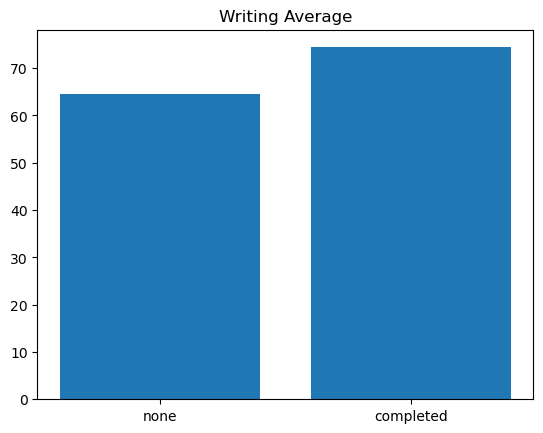

In [56]:
names3 = list(result_writing.keys())
values3 = list(result_writing.values())
plt.bar(range(len(result_writing)), values3, tick_label=names3)
#plt.xticks(rotation=50)
#fig.subplots_adjust(bottom=spacing)
plt.title('Writing Average')
plt.show()

## Gender impact on scores

In [68]:
df[['gender','math score']].groupby('gender').mean()

,math score
gender,
female,63.633205
male,68.728216


In [69]:
df[['gender','reading score']].groupby('gender').mean()

,reading score
gender,
female,72.608108
male,65.473029


In [70]:
df[['gender','writing score']].groupby('gender').mean()

,writing score
gender,
female,72.467181
male,63.311203


In [92]:
'''
plt.figure(figsize=(15,6))
sns.countplot(data=df,y=df["parental level of education"],hue="gender")
plt.title("Education Level Count On Both Genders")
plt.ylabel("Education Level")
plt.show()
'''

'\nplt.figure(figsize=(15,6))\nsns.countplot(data=df,y=df["parental level of education"],hue="gender")\nplt.title("Education Level Count On Both Genders")\nplt.ylabel("Education Level")\nplt.show()\n'

## Race/Ethnicity impact on scores

In [71]:
df[['race/ethnicity','math score']].groupby('race/ethnicity').mean()

,math score
race/ethnicity,
group A,61.629213
group B,63.452632
group C,64.463950
group D,67.362595
group E,73.821429


In [72]:
df[['race/ethnicity','reading score']].groupby('race/ethnicity').mean()

,reading score
race/ethnicity,
group A,64.674157
group B,67.352632
group C,69.103448
group D,70.030534
group E,73.028571


In [73]:
df[['race/ethnicity','writing score']].groupby('race/ethnicity').mean()

,writing score
race/ethnicity,
group A,62.674157
group B,65.600000
group C,67.827586
group D,70.145038
group E,71.407143


<Axes: >

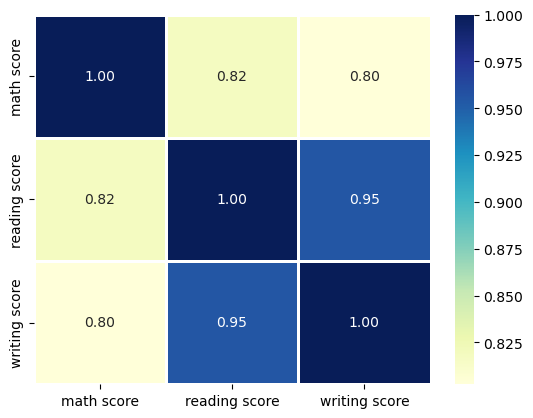

In [95]:
sns.heatmap(df.corr(), annot = True, fmt = '.2f', linewidths= 0.8, cmap="YlGnBu")

In this study, our goal is to determine the features that impact math, reading and writing scores of students. We begin with a basic data analysis and visualization of average scores (of the 3 categories) for the following:
1. Parental Education: From the plot it can be seen that the highest average score for all three categories is for parents who have Master's degree. The High School Level education has the lowest average. One important thisng to note is that the difference in averages across all education levels does not seem significant.

2. Test Preparation: Test preparation course seems to have a consistent impact on student grades across all 3 categories. Those who completed the course have a higher average.
3. Gender: There is an interesting pattern whn looking at averages for the two genders. Male average is higher for the math score only. The reading and writing averages are much higher for female gender.
4. Race/Ethnicity: Groip E outperforms all other groups in all 3 test scores.